## PCA: Análisis de componentes principales

### Proyección de un vector

Sean $\vec{a}$ y $\vec{b}$ vectores. La proyección de $\vec{a}$ sobre $\vec{b}$ está dada por:

### $ \vec{a_p} = a_p \hat{b} = ({{\vec{a} * \vec{b}}\over{|\vec{b}| }})\hat{b}$

#### Ejemplo

#### $\vec{a} = (2, 2)$ y $\vec{b} = (1,0)$

#### $|\vec{b}| = 1 \rightarrow \hat{b} = (1, 0)$

#### $\vec{a}*\vec{b} = 2*1 + 2*0 = 2$

#### $\vec{a_p} = ({2\over{1}}) (1, 0) = (2, 0)$

### ¿Para que nos sirve proyectar un vector?

Así como tenemos la matriz de covarianza, también podemos hablar de cuál es la varianza a lo largo de cierta dirección en un conjunto de datos.

### Reducción de dimensionalidad con PCA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Modificar estilos para los gráficos
scale_x = 2
scale_y = 1.5
figsize = (6.4*scale_x, 4.8*scale_y)
plt.rcParams['figure.figsize'] = figsize
sns.set(rc={'figure.figsize': figsize})
plt.style.use('seaborn-darkgrid')

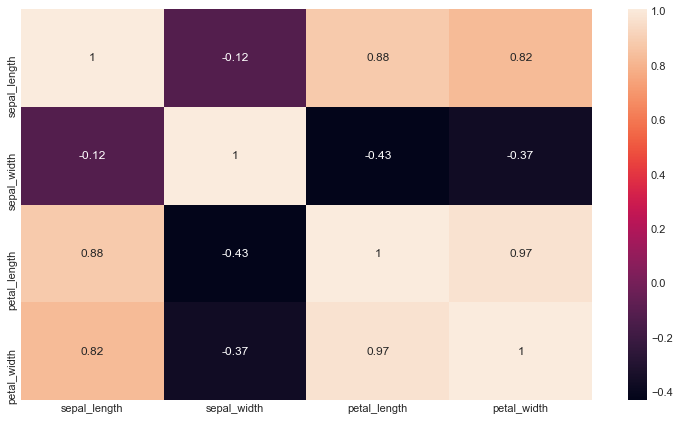

In [3]:
# Cargar dataset
iris = sns.load_dataset('iris')

scaler = StandardScaler()

scaled = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

covariance_matrix = np.cov(scaled.T)

sns.heatmap(
    covariance_matrix, cbar=True, annot=True, 
    annot_kws={'size': 12},
    yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
)

plt.show()

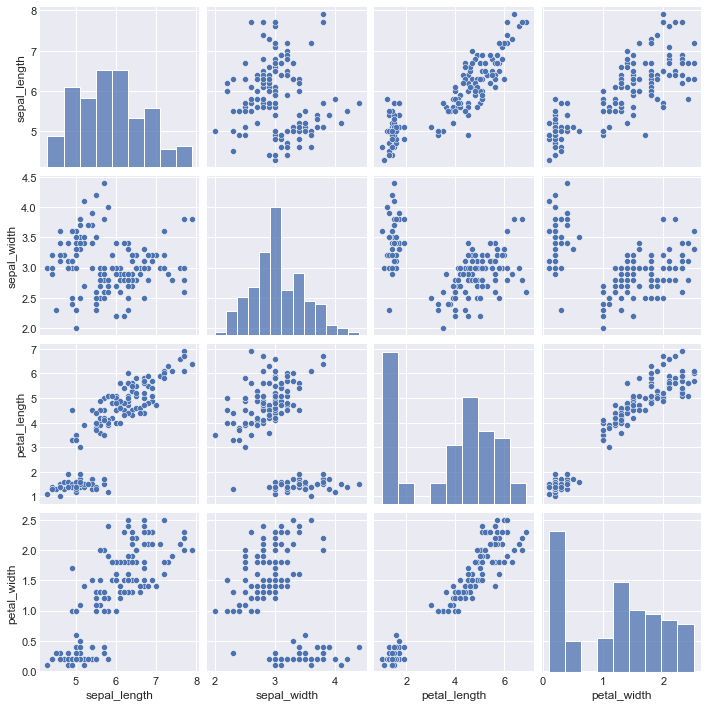

In [4]:
sns.pairplot(iris)

plt.show()

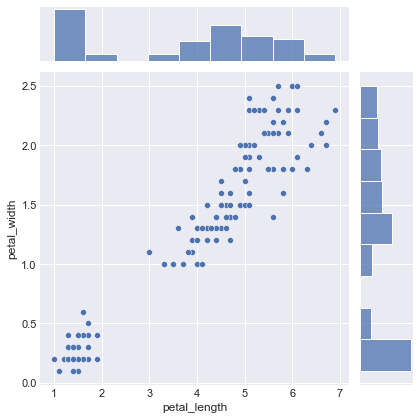

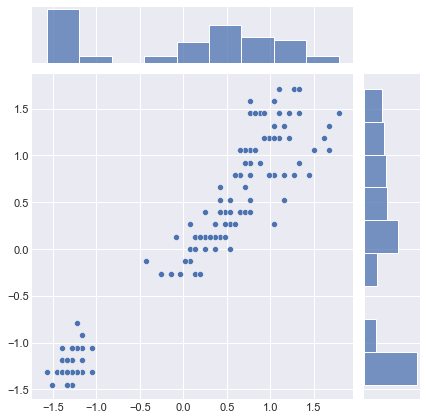

In [25]:
sns.jointplot(data=iris, x='petal_length', y='petal_width')

sns.jointplot(x=scaled[:, 2], y=scaled[:, 3])

plt.show()

In [11]:
# Obtener valores y vectores propios de la matriz de covarianza

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [12]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [13]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

Cada vector propio es una de las direcciones principales a lo largo de la cual capturamos varianza de los datos originales

In [14]:
# Varianza explicada por cada componente

variance_explained = []

for v in eigen_values:
    variance_explained.append(v/sum(eigen_values)*100)
    
variance_explained

[72.9624454132999, 22.850761786701725, 3.6689218892828612, 0.5178709107154993]

#### Reducir dimensiones

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)

pca.fit(scaled)

PCA(n_components=2)

In [17]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [18]:
reduced_scaled = pca.transform(scaled)

In [19]:
scaled.shape

(150, 4)

In [20]:
reduced_scaled.shape

(150, 2)

In [21]:
iris['pca_1'] = reduced_scaled[:, 0]
iris['pca_2'] = reduced_scaled[:, 1]

In [22]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835


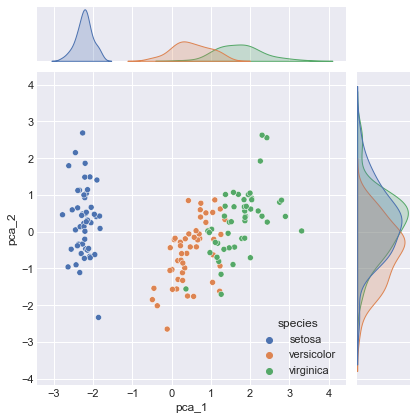

In [27]:
sns.jointplot(data=iris, x='pca_1', y='pca_2', hue='species')

plt.show()